<a href="https://colab.research.google.com/github/egesendogan/CIFAR-10-Classification-Using-PyTorch/blob/main/Transfer%20Learning/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import torch
import torchvision
from torchvision import datasets, models
import torchvision.transforms as transforms 

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim import lr_scheduler

import time
import copy

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
batch_size = 64

train_set = torchvision.datasets.CIFAR10(root='./data2', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set,batch_size=batch_size,shuffle=True,num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='./data2',train=False,download=True,transform=transform)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=batch_size,shuffle=False,num_workers=2)

dataloaders = {'train':torch.utils.data.DataLoader(train_set,batch_size=batch_size,shuffle=True,num_workers=2),
               'test': torch.utils.data.DataLoader(test_set,batch_size=batch_size,shuffle=False,num_workers=2)}

dataset_sizes = {'train':50000,'test':10000}

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
dataset_sizes['train']

50000

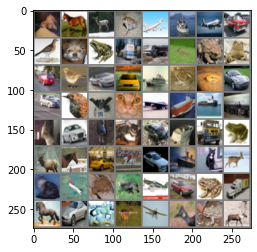

  dog horse  deer  frog plane  ship plane   car  bird   dog  frog truck truck  deer  frog  frog   car  bird   car   car  ship  frog  frog   car   car  bird plane   cat plane  ship  ship truck  bird   car  bird   cat  frog  ship truck  frog  deer horse   car horse   car  ship   cat  deer   cat plane  frog  deer plane   car  frog truck horse   car horse  deer plane  bird  frog  deer


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [ ]:
resnet = models.resnet18(pretrained=True)
num_ftrs = resnet.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
resnet.fc = nn.Linear(num_ftrs, 10)

In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(),lr=0.001,momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
since = time.time()

best_model_wts = copy.deepcopy(resnet.state_dict())
best_acc = 0.0

all_loss = {'train':[],'test':[]}
all_acc = {'train':[],'test':[]}

for epoch in range(25):
  print('Epoch {}/{}'.format(epoch, 25 - 1))
  print('-' * 10)

  # Each epoch has a training and validation phase
  for phase in ['train', 'test']:
    if phase == 'train':
      resnet.train()  # Set model to training mode
    else:
      resnet.eval()   # Set model to evaluate mode

    running_loss = 0.0
    running_corrects = 0

    # Iterate over data.
    for inputs, labels in dataloaders[phase]:

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward
      # track history if only in train
      with torch.set_grad_enabled(phase == 'train'):
        outputs = resnet(inputs)
        _, preds = torch.max(outputs, 1)
        _loss = loss(outputs, labels)

        # backward + optimize only if in training phase
        if phase == 'train':
          _loss.backward()
          optimizer.step()

      # statistics
      running_loss += _loss.item() * inputs.size(0)
      running_corrects += torch.sum(preds == labels.data)
      
    if phase == 'train':
      scheduler.step()

    epoch_loss = running_loss / dataset_sizes[phase]
    epoch_acc = running_corrects.double() / dataset_sizes[phase]

    all_loss[phase].append(epoch_loss)
    all_acc[phase].append(epoch_acc)

    print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

    # deep copy the model
    if phase == 'test' and epoch_acc > best_acc:
      best_acc = epoch_acc
      best_model_wts = copy.deepcopy(resnet.state_dict())
    
    print()

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
print('Best val Acc: {:4f}'.format(best_acc))

  # load best model weights
resnet.load_state_dict(best_model_wts)

Epoch 0/24
----------
train Loss: 1.0399 Acc: 0.6393

test Loss: 0.7186 Acc: 0.7545

Epoch 1/24
----------
train Loss: 0.6329 Acc: 0.7807

test Loss: 0.6322 Acc: 0.7808

Epoch 2/24
----------
train Loss: 0.4808 Acc: 0.8335

test Loss: 0.6041 Acc: 0.7997

Epoch 3/24
----------
train Loss: 0.3731 Acc: 0.8698

test Loss: 0.6201 Acc: 0.8014

Epoch 4/24
----------
train Loss: 0.2836 Acc: 0.9008

test Loss: 0.6443 Acc: 0.8035

Epoch 5/24
----------
train Loss: 0.2237 Acc: 0.9224

test Loss: 0.7151 Acc: 0.7972

Epoch 6/24
----------
train Loss: 0.1740 Acc: 0.9386

test Loss: 0.7245 Acc: 0.8070

Epoch 7/24
----------
train Loss: 0.1034 Acc: 0.9657

test Loss: 0.6848 Acc: 0.8175

Epoch 8/24
----------
train Loss: 0.0814 Acc: 0.9743

test Loss: 0.6948 Acc: 0.8188

Epoch 9/24
----------
train Loss: 0.0686 Acc: 0.9790

test Loss: 0.7012 Acc: 0.8198

Epoch 10/24
----------
train Loss: 0.0626 Acc: 0.9814

test Loss: 0.7124 Acc: 0.8211

Epoch 11/24
----------
train Loss: 0.0568 Acc: 0.9833

test Loss

<All keys matched successfully>

In [ ]:
PATH = './resnet.pth'
torch.save(resnet.state_dict(), PATH)

In [ ]:
import pickle

a_file = open("data.pkl", "wb")
pickle.dump(all_loss, a_file)
a_file.close()

b_file = open("data2.pkl", "wb")
pickle.dump(all_acc, b_file)
b_file.close()

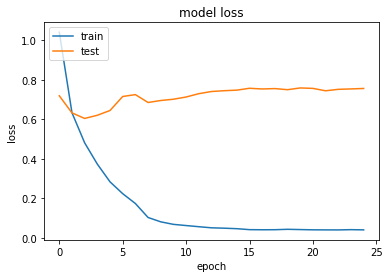

In [ ]:
from matplotlib import pyplot as plt
plt.plot(all_loss['train'])
plt.plot(all_loss['test'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

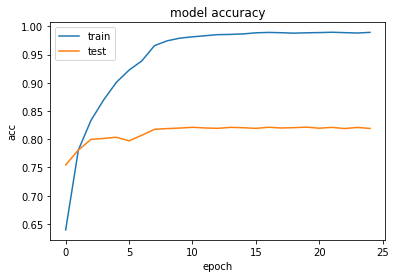

In [ ]:
from matplotlib import pyplot as plt
plt.plot(all_acc['train'])
plt.plot(all_acc['test'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
resnet.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = resnet(images)

    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy: %d %%' % (100 * correct / total))

Accuracy: 82 %
